In [ ]:
# Description: This program use Convolutional Neural Networks(CNN)
# classify handwritten digits as number 0-9

In [11]:
#importing the libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [13]:
x_train, x_test = mnist.load_data()

In [14]:
#Get the image shape
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


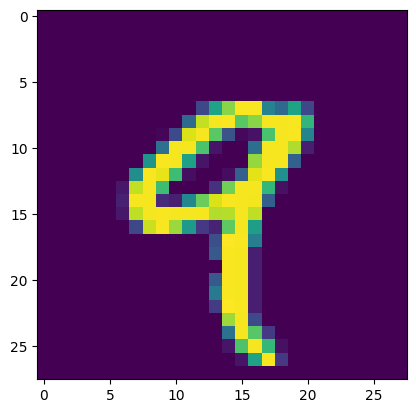

In [15]:
plt.imshow(X_train[4])

In [16]:
# Reshaping the data to fit the model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [17]:
# One-Hot Encoding:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [18]:
# Build the CNN model
model = Sequential()
# Add model layers
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
#Train the model
hist = model.fit(X_train,y_train_one_hot, validation_data=(X_test,y_test_one_hot), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6914 - loss: 4.3666 - val_accuracy: 0.9250 - val_loss: 0.2592
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8970 - loss: 0.3792 - val_accuracy: 0.9435 - val_loss: 0.2050
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9239 - loss: 0.2712 - val_accuracy: 0.9579 - val_loss: 0.1754
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9409 - loss: 0.2200 - val_accuracy: 0.9605 - val_loss: 0.1526
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9476 - loss: 0.1889 - val_accuracy: 0.9617 - val_loss: 0.1410
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9549 - loss: 0.1632 - val_accuracy: 0.9647 - val_loss: 0.1429
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9588 - loss: 0.1524 - val_accuracy: 0.9669 - val_loss: 0.1240
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9632 - loss: 0.1391 -